Import the tidyverse.

In [1]:
library('tidyverse')
options(repr.plot.width=4, repr.plot.height=3)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Bars

Let's use the "diamonds" data set. Preview the first five rows of the diamonds dataset using the `head` function.  
(*Hint: try* `?head` *to get the help page for the* `head` *function*)

In [10]:
head(diamonds)
# could also do diamond %>% head

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


Make a bar chart of the "cut" column. About how many rows are there for the cut category "Ideal"?

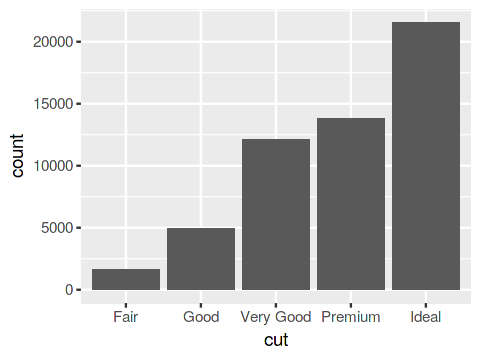

In [7]:
# Bar Chart of Count vs. Count
# There is a little over 20,000 rows for the cut category "Ideal"

p = ggplot(diamonds, aes(x=cut)) + geom_bar()
p

In [11]:
# How to get exact count for cut from diamonds data

diamonds$cut %>% table

.
     Fair      Good Very Good   Premium     Ideal 
     1610      4906     12082     13791     21551 

Use `coord_flip` to rotate the chart by 90 degrees. 

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



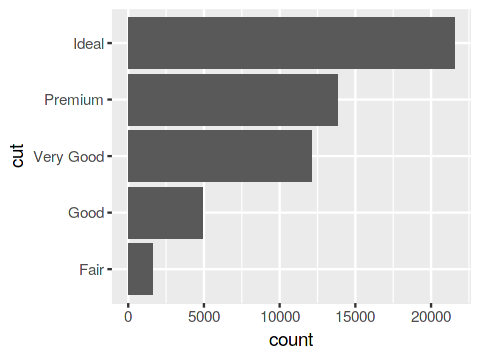

In [9]:
p = p + coord_flip()
p

# Instead of having to print with p everytime, can also do
# (p = p + coord_flip())
# to immediately print plot.

# Lines

We'll use flight data from the Bureau of Transportation Statistics
https://www.transtats.bts.gov/DatabaseInfo.asp?DB_ID=120&Link=0

In [16]:
# uncomment the following:

library(nycflights13)
flight.data = flights %>%
     group_by(month, carrier, year) %>%
     summarize(N_flights = n()) %>%
     filter(carrier %in% c('UA', 'AA', 'US'))

What are the columns in `flight.data`? (*Hint: preview the table*)

In [18]:
flight.data %>% head

month,carrier,year,N_flights
<int>,<chr>,<int>,<int>
1,AA,2013,2794
1,UA,2013,4637
1,US,2013,1602
2,AA,2013,2517
2,UA,2013,4346
2,US,2013,1552


First, make a bar chart of the `carrier` column? Does this make sense?

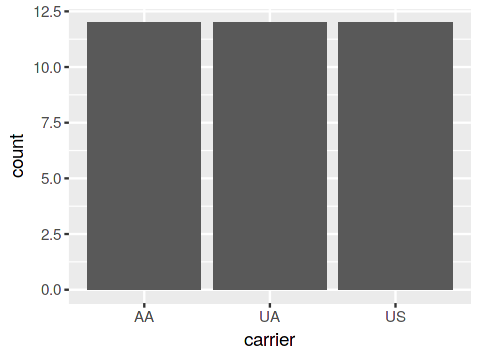

In [21]:
(p = ggplot(flight.data, aes(x=carrier)) + geom_bar())

Plot month versus number of flights grouped according to carrier.

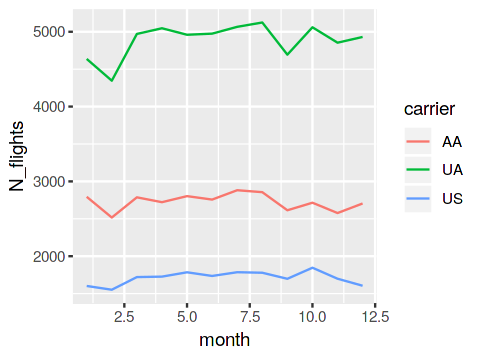

In [22]:
p = ggplot(flight.data, aes(x = month, y = N_flights, color = carrier))

p = p + geom_line()

p

# Smooth

Plot a scatter plot (`geom_point`) of carat versus price with the diamonds dataset.

There is a lot of overplotting in this figure. Make the same plot but use the `alpha` value to reduce
the opacity of the points.  
(*Hint: alpha values can be set from 0 (transparent) to 1 (opaque)*)

Facetting can also help with overplotting. Facet the chart by `cut`.

In [ ]:
# options(repr.plot.width=7, repr.plot.height=6)

Add a `geom_smooth` to your facetted plot to emphasize the trend in the data.

# Tiles

This is a dataset of otter skull morphology.

In [2]:
# uncomment the following:
otter.data = read.csv('https://jcoliver.github.io/learn-r/data/otter-mandible-data.csv') %>%
    gather(characteristic, value, -species, -museum, -accession)

otter.data %>% head

species,museum,accession,characteristic,value
<fct>,<fct>,<fct>,<chr>,<dbl>
A. cinerea,AMNH,101458,m1,15.100
A. cinerea,AMNH,101461,m1,12.740
A. cinerea,AMNH,101466,m1,12.425
A. cinerea,AMNH,101635,m1,13.400
A. cinerea,AMNH,101459,m1,14.400
A. cinerea,AMNH,101462,m1,14.525


Make a bar chart of the museum column. What is this chart telling you?

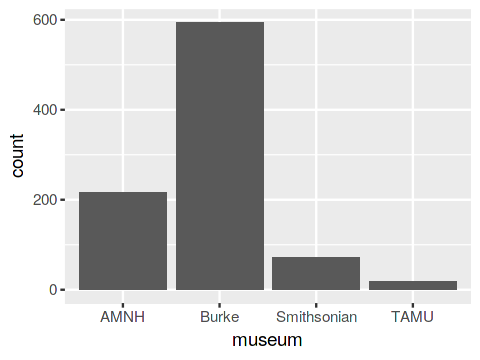

In [3]:
options(repr.plot.width=4, repr.plot.height=3)

p = ggplot(otter.data, aes(x = museum))

p = p + geom_bar()

p

# Most otters are in Burke museum.

Make a heatmap of the data with `characteristic` on the x-axis and `species` on the y-axis.

In [7]:
# uncomment this to get a scaled version of the data:

otter.data.scaled = otter.data %>%
    group_by(characteristic) %>%
    mutate(value.scaled = scales::rescale(value))

otter.data.scaled %>% head

species,museum,accession,characteristic,value,value.scaled
<fct>,<fct>,<fct>,<chr>,<dbl>,<dbl>
A. cinerea,AMNH,101458,m1,15.100,0.27867699
A. cinerea,AMNH,101461,m1,12.740,0.11259676
A. cinerea,AMNH,101466,m1,12.425,0.09042928
A. cinerea,AMNH,101635,m1,13.400,0.15904293
A. cinerea,AMNH,101459,m1,14.400,0.22941590
A. cinerea,AMNH,101462,m1,14.525,0.23821253


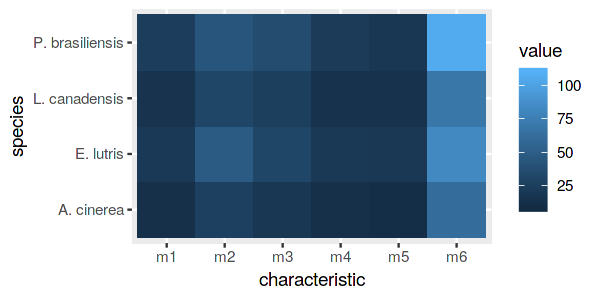

In [8]:
options(repr.plot.width=5, repr.plot.height=2.5)

p = ggplot(otter.data, aes(x = characteristic, y = species, fill=value))

p = p + geom_tile()

p

What can you do to make the chart more visually appealing?
- make the `color` white
- use `scale_fill_gradient(low = "white", high = "steelblue")`

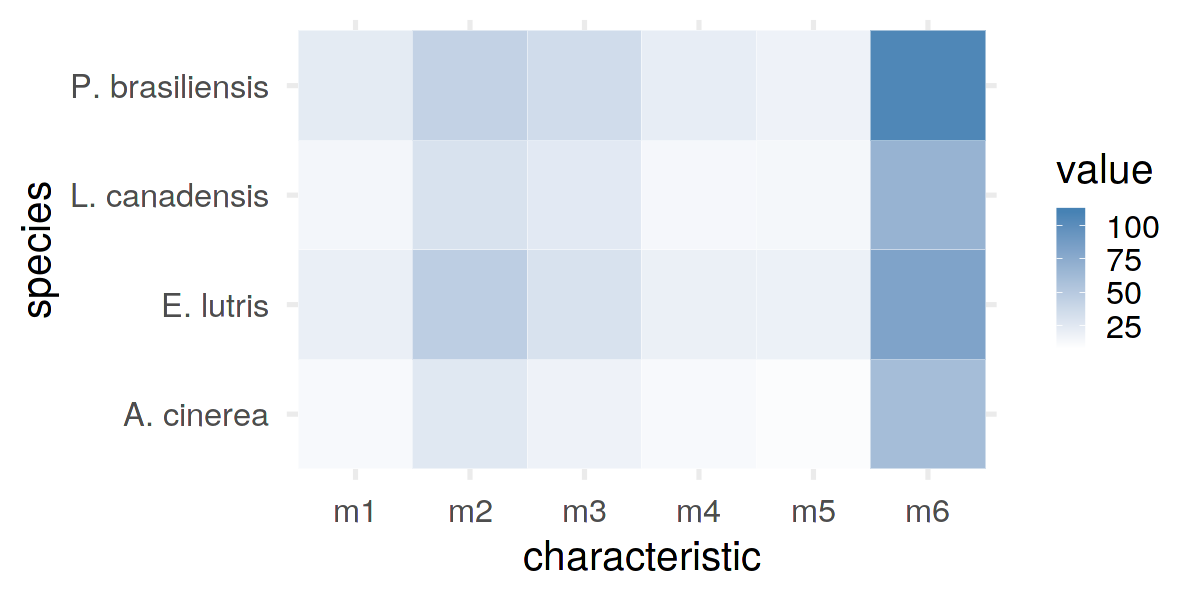

In [31]:
p = ggplot(otter.data, aes(x = characteristic, y = species, fill=value))

p = p + geom_tile(color= "white")
# Color = white makes borders inside white

p = p + scale_fill_gradient(low= "white", high = "steelblue")

p = p + theme_minimal(base_size=24)

p

# Points with jitter

Let's stick with the otter data. We could also use a point+jitter plot to represent the data. Make a point+jitter plot below with species on the x-axis, value on the y-axis, and facet the chart by characteristic. 

Warning message:
“Removed 5 rows containing missing values (geom_point).”


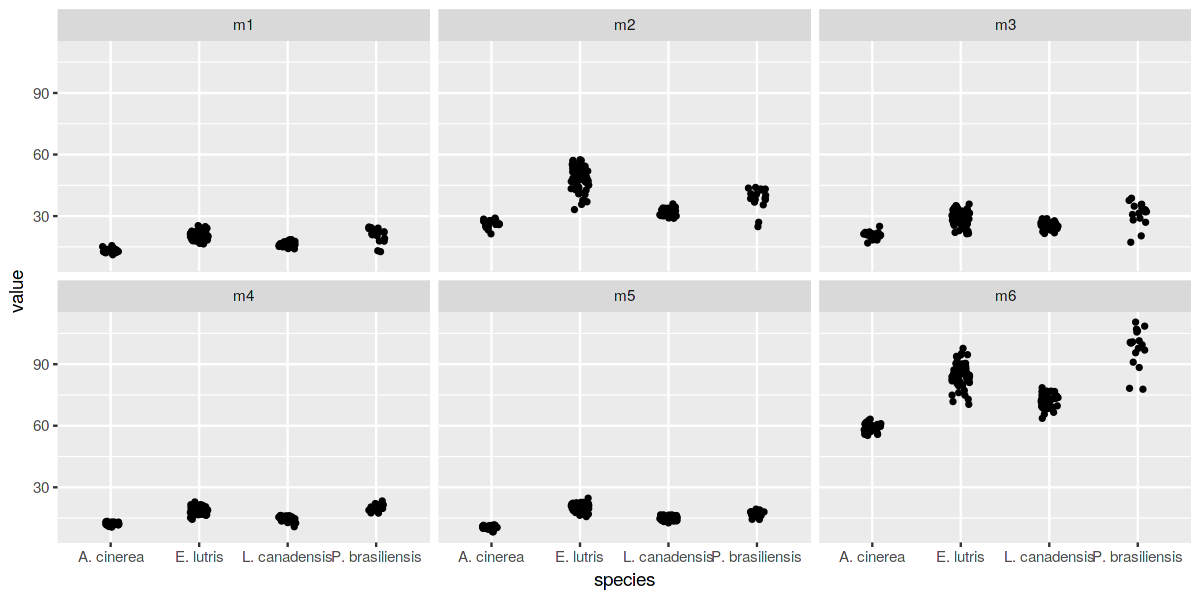

In [25]:
options(repr.plot.width=10, repr.plot.height=5)

p = ggplot(otter.data, aes(x=species, y=value))

p = p + facet_wrap(~ characteristic, nrow = 2)

p = p + geom_point(position = position_jitter(h = 0, w = 0.10), size = 1)

p

Make the axis test legible by rotating the text 45 degrees.

Warning message:
“Removed 5 rows containing missing values (geom_point).”


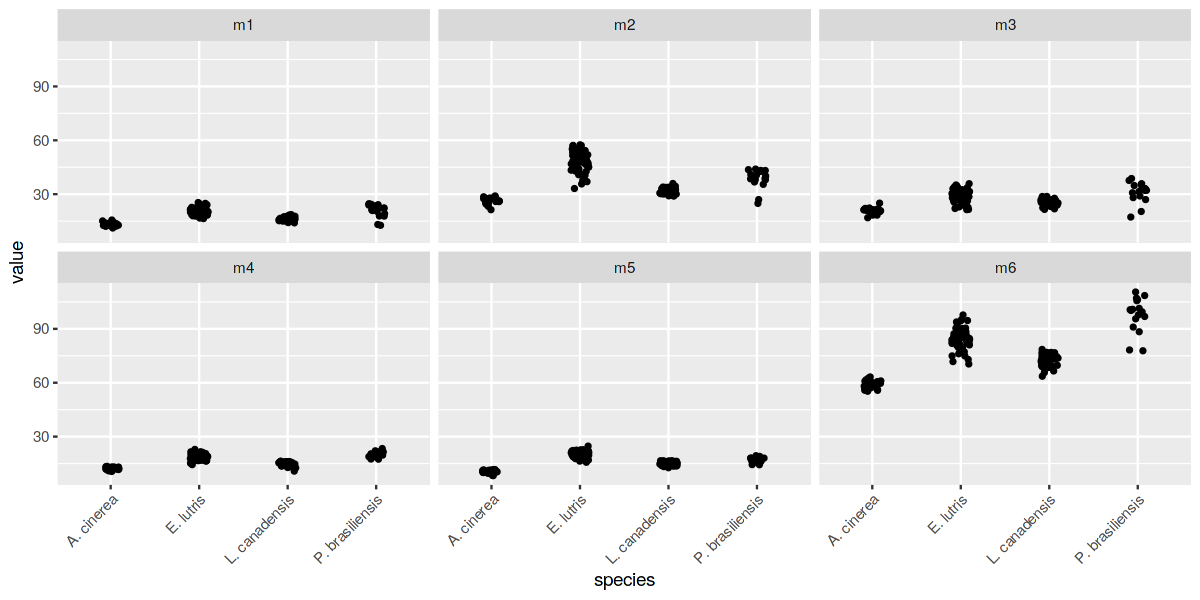

In [26]:
p = p + theme(axis.text.x = element_text(angle = 45, hjust = 1))
p

What happens if you pass the argument `scales='free_y` to `facet_wrap`?

Warning message:
“Removed 5 rows containing missing values (geom_point).”


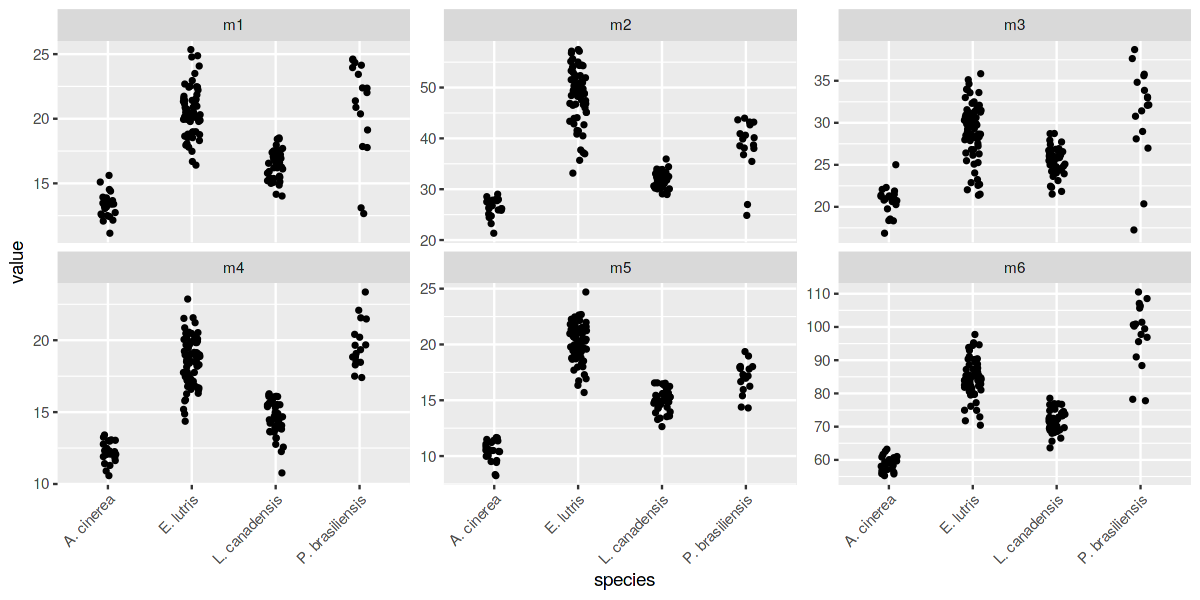

In [27]:
p = p + facet_wrap(~ characteristic, nrow = 2, scales='free_y')
p
# y axis is different for each graph as needed

Do you prefer the heatmap or the point+jitter plot?